# SVDによる圧縮の例（not 次元削減）
- 参考: [Tutorial: Linear algebra on n-dimensional arrays](https://numpy.org/devdocs/user/tutorial-svd.html)
- 全体の流れ
  - 画像ファイルをグレイスケールに変換する。（そのままだとR, G, Bの3レイヤー分の行列があるので、今回はグレイスケールに変換して1つの行列として扱う）
  - グレイスケールが保存されている行列を特異値分解する。
  - 分解によりどのぐらい近似できているのかを確認する。
  - 近似度合いがどのぐらいあるのかを可視化して確認する。

In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

## 画像データの準備

<class 'numpy.ndarray'>


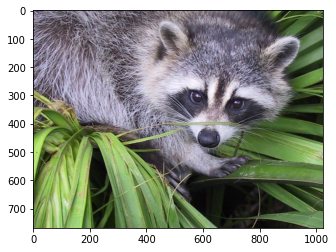

In [2]:
img = misc.face()
print(type(img))
plt.imshow(img)

## 画像データのshape確認

(768, 1024, 3)
[[121 138 153 ... 119 131 139]
 [ 89 110 130 ... 118 134 146]
 [ 73  94 115 ... 117 133 144]
 ...
 [ 87  94 107 ... 120 119 119]
 [ 85  95 112 ... 121 120 120]
 [ 85  97 111 ... 120 119 118]]


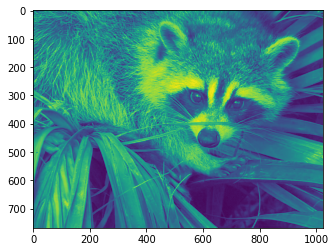

In [3]:
print(img.shape)
print(img[:, :, 0])
plt.imshow(img[:, :, 0])

## グレイスケール変換
- $grayscale = 0.2126R + 0.7152G + 0.0722B$

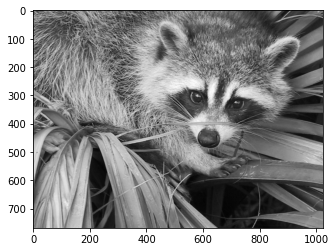

In [4]:
img_array = img / 255
grayscale = img_array @ [0.2126, 0.7152, 0.0722]
plt.imshow(grayscale, cmap="gray")

## 特異値分解

In [5]:
U, s, Vt = np.linalg.svd(grayscale)
print(U.shape, s.shape, Vt.shape)

(768, 768) (768,) (1024, 1024)


## sを対角行列に変換
- sは対角行列。正方行列ならnp.diag()で変換できるが、特異値分解で出てくる特異値は行列サイズが異る（U, Vtに合わせる必要がある）。そこで、サイズを指定したゼロ行列を作成して対角成分のみコピーすることで作成している。

In [6]:
# 対角行列に変換
sigma = np.zeros((U.shape[1], Vt.shape[0]))
for i in range(U.shape[1]):
  sigma[i, i] = s[i]

# 特異値分解によりどのぐらい近似できているかを確認
approximation = np.dot(np.dot(U, sigma), Vt)
diff = grayscale - approximation
print(np.linalg.norm(diff))

1.406775511759051e-12


In [7]:
# 特異値分解によりどのぐらい近似できているかを確認
np.allclose(grayscale, approximation)

True

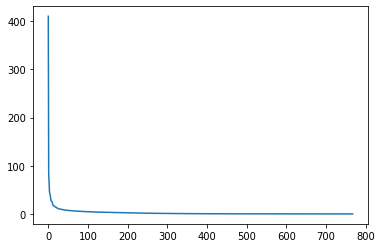

In [8]:
# 特異値の大きさを確認
plt.plot(s)

## 圧縮してみる
- 特異値の大きい順に「特異値1〜100位までで近似した場合」を確認。

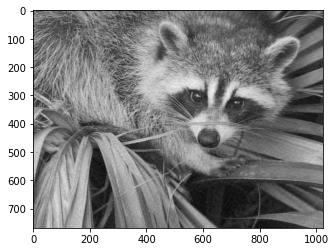

In [9]:
k = 100
approximation = np.dot(np.dot(U, sigma[:, :k]), Vt[:k, :])
plt.imshow(approximation, cmap="gray")

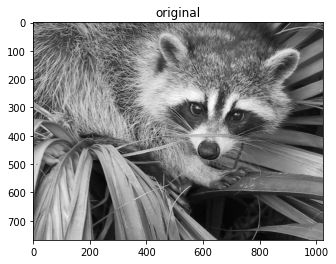

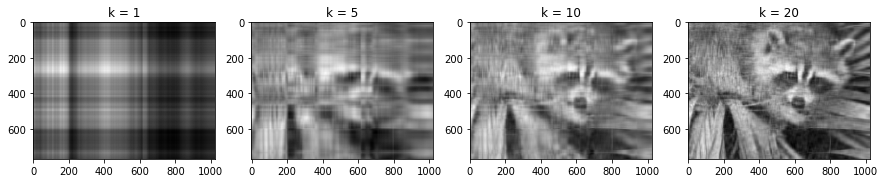

In [10]:
# 特異値1位〜20位までの間で確認してみる
approximation = []
ks = [1, 5, 10, 20]
for k in ks:
  approximation.append(np.dot(np.dot(U, sigma[:, :k]), Vt[:k, :]))

# オリジナル
plt.imshow(grayscale, cmap="gray")
plt.title("original")

# 近似
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
for ax, app, k in zip(axes, approximation, ks):
  ax.imshow(app, cmap="gray")
  ax.set_title("k = {}".format(k))
